In [1]:
#imports
#imports
import pandas as pd
import time
from pathlib import Path
from datetime import datetime
import sqlite3
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
#dbtable = ['innistrad-midnight-hunt', '10th-edition', 'the-brothers-war', 'dragons-maze', 'dominaria-united', 'throne-of-eldraine', 'gatecrash', 'march-of-the-machine-the-aftermath', 'march-of-the-machine', 'kamigawa-neon-dynasty', 'phyrexia-all-will-be-one', 'return-to-ravnica', 'streets-of-new-capenna', 'innistrad-crimson-vow', 'wilds-of-eldraine']
dbtable = '10th-edition'

In [3]:
# build conection to price db
price =  Path("../Resources/price.db")
con = sqlite3.connect(price)
cur = con.cursor()

In [4]:
# import set data as pd df
db_df = pd.read_sql_query(f"SELECT * FROM '{dbtable}_priceData'", con)
db_df

,Unnamed: 0,Name,Market Price,date
0,2,Abundance,$1.88,2023-11-28
1,2,Academy Researchers,$0.15,2023-11-28
2,2,Adarkar Wastes,$6.66,2023-11-28
3,2,Afflict,$0.05,2023-11-28
4,2,Aggressive Urge,$0.13,2023-11-28
...,...,...,...,...
773,2,Wurm's Tooth,$0.26,2023-11-29
774,2,Yavimaya Coast,$1.29,2023-11-29
775,2,Yavimaya Enchantress,$0.20,2023-11-29
776,2,Youthful Knight,$0.07,2023-11-29


In [5]:
setplist= []
date_list = list(db_df['date'].unique())
#print(date_list[1])

In [6]:
#day_df= db_df.loc[db_df["date"]== date_list[1]]
#day_df = day_df.reset_index(drop=True)
#day_df

In [7]:
for x in date_list:
    day_df= db_df.loc[db_df["date"]== x ]
    day_df = day_df.reset_index(drop=True)
    for i in  range(len(day_df)):
        x = day_df.loc[i,['Market Price']] 
        x = x['Market Price']
        x = x.replace("$", "")
        x = x.replace("None", "")
        day_df['Market Price'][i] = x
    day_df['Market Price'] = pd.to_numeric(day_df['Market Price'])
    set_price = day_df['Market Price'].sum()
    setplist.append(set_price)
print(set_price)

C:\Users\pc\AppData\Local\Temp\ipykernel_21756\4221786325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['Market Price'][i] = x
C:\Users\pc\AppData\Local\Temp\ipykernel_21756\4221786325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['Market Price'][i] = x
C:\Users\pc\AppData\Local\Temp\ipykernel_21756\4221786325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['Market Price'][i] = x
C:\Users\pc\AppData

C:\Users\pc\AppData\Local\Temp\ipykernel_21756\4221786325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['Market Price'][i] = x
C:\Users\pc\AppData\Local\Temp\ipykernel_21756\4221786325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['Market Price'][i] = x
C:\Users\pc\AppData\Local\Temp\ipykernel_21756\4221786325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['Market Price'][i] = x
C:\Users\pc\AppData

422.37


C:\Users\pc\AppData\Local\Temp\ipykernel_21756\4221786325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['Market Price'][i] = x
C:\Users\pc\AppData\Local\Temp\ipykernel_21756\4221786325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['Market Price'][i] = x
C:\Users\pc\AppData\Local\Temp\ipykernel_21756\4221786325.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_df['Market Price'][i] = x
C:\Users\pc\AppData

In [8]:
print(setplist)

[422.78000000000003, 422.37]


In [9]:
sip_list= zip(setplist, date_list)
mkt_df = pd.DataFrame(sip_list,columns = ['price', 'date'])
mkt_df['date'] = pd.to_datetime(mkt_df['date'])
mkt_df['Date Numeric'] = pd.to_numeric(mkt_df['date'])
mkt_df["price"] = pd.to_numeric(mkt_df["price"])
mkt_df

,price,date,Date Numeric
0,422.78,2023-11-28,1701129600000000000
1,422.37,2023-11-29,1701216000000000000


<function matplotlib.pyplot.show(close=None, block=None)>

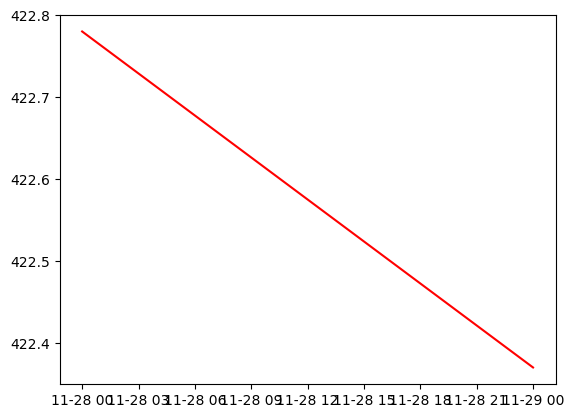

In [10]:
# plot line graph
plt.plot(mkt_df['date'], mkt_df['price'], color='red', label= dbtable)
plt.show

In [11]:
# calculate regresion
slope, intercept, r, p, se  = linregress(mkt_df['price'], mkt_df['Date Numeric'])
print(r)
print(slope)

-1.0
-210731707317060.34


In [12]:
# show/ save regresion value  

In [13]:
# save to a regresion table